EGARCH(Exponential Generalized Autoregressive Conditional Heteroskedasticity) 모형은 Nelson(1991)이 제안한 모형

조건부 분산의 비대칭성(asymmetry)과 로그 척도를 활용하여 GARCH 모형의 한계를 보완한 확장된 형태

In [1]:
pip install arch


   ---------------------------------------- 0.0/928.2 kB ? eta -:--:--
   --------------------------------- ------ 786.4/928.2 kB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 928.2/928.2 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# 코드 설명
# 데이터 시뮬레이션

# 랜덤한 수익률 데이터를 생성하고, 특정 구간에 변동성 클러스터링을 추가.
# EGARCH(1,1) 모델 적합

# arch 라이브러리를 사용해 EGARCH 모델을 적합.
# 결과 요약

# 모델 파라미터와 통계량을 요약.
# 조건부 변동성 시각화

# EGARCH 모델로 추정한 시점별 조건부 변동성을 플롯.

                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -2505.54
Distribution:                  Normal   AIC:                           5019.07
Method:            Maximum Likelihood   BIC:                           5038.70
                                        No. Observations:                 1000
Date:                Tue, Dec 03 2024   Df Residuals:                      999
Time:                        13:37:28   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2027  9.007e-02      2.250  2.445e-02 [2.612e-0

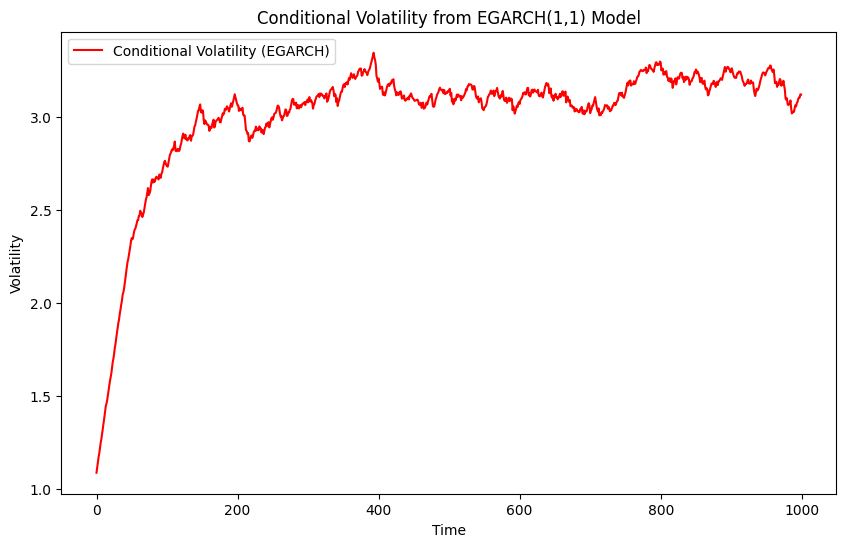

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# 1. 데이터 시뮬레이션 (Financial Returns with Volatility Clustering)
np.random.seed(42)
n = 1000
returns = np.random.normal(0, 1, n)
for i in range(1, n):
    if i % 50 == 0:  # Introduce volatility clustering
        returns[i:i+50] += np.random.normal(0, 3, 50)

# Convert the returns into a pandas DataFrame
returns_df = pd.DataFrame(returns, columns=["returns"])

# 2. EGARCH(1,1) 모델 적합
model = arch_model(returns_df["returns"], vol="EGARCH", p=1, q=1)
results = model.fit(disp="off")

# 3. 결과 요약 출력
print(results.summary())

# 4. 조건부 변동성 시각화
conditional_volatility = results.conditional_volatility
plt.figure(figsize=(10, 6))
plt.plot(conditional_volatility, label="Conditional Volatility (EGARCH)", color="red")
plt.title("Conditional Volatility from EGARCH(1,1) Model")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()
plt.show()
